In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import binarize

In [ ]:
"""
데이터프레임 정렬 : sort_values()
튜플 정렬 : sorted()
리스트 정려 : list.sort(), sorted(list)
"""

In [ ]:
# sort_values(self, by, axis=0, ascending=True, inplace=)
# self, by : 정렬할 파트, ascending 오름차순, inplace : 정렬을한 후 그 결과를 실제 dataframe에 적용할지 말지

In [14]:
df=pd.DataFrame({
    "seq":[10,30,np.nan],
    "name":["park","kim","choi"],
    "age":[25,35,22]
})

df.sort_values(by="seq",ascending=False, inplace=True, na_position="first")
df

,seq,name,age
2,NaN,choi,22
1,30.0,kim,35
0,10.0,park,25


In [19]:
tup=[(1,"kim",25),(3,"lee",20),(2,"park",15)]
# sorted(튜플변수, 기준)
sorted(tup)
sorted(tup, key=lambda p:p[0]) # key:정렬기준
sorted(tup, key=lambda p:p[1])
sorted(tup, key=lambda p:p[2], reverse=True)

[(1, 'kim', 25), (3, 'lee', 20), (2, 'park', 15)]

In [24]:
myList=[0,1,2,5,4,7,8,6,3]
sorted(myList)
myList
myList.sort()
myList

sorted(myList, reverse=True)

[8, 7, 6, 5, 4, 3, 2, 1, 0]

In [34]:
s1=pd.Series([3,1,4,2,5])
s1
s1[2]
s1[:3]
# 열 평균값보다 큰 데이이터만 추출
s1[s1>s1.mean()]
s1[[4,2]]

4    5
2    4
dtype: int64

In [45]:
s=pd.Series([10,20,30,40,50], index=["a","b","c","d","e"])
s
s[["a","c","e"]]
s.get(["a","c","e"]) # 위와 동일한 결과
s["c"]=300
"c" in s # 해당 index가 s에 있는냐?
"z" in s

False

In [48]:
df=pd.DataFrame({
    'c1':[1,2,3],
    'c2':[4,5,6],
    'c3':[7,8,np.nan]
}, index=['r1','r2','r3'])
df
df.info() # R언어 str()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, r1 to r3
Data columns (total 3 columns):
c1    3 non-null int64
c2    3 non-null int64
c3    2 non-null float64
dtypes: float64(1), int64(2)
memory usage: 96.0+ bytes


Index(['c1', 'c2', 'c3'], dtype='object')

In [54]:
df13=pd.DataFrame(df)
df13

df13=pd.DataFrame(df, index=['r1','r3'])
df13

dfc13=pd.DataFrame(df, columns=['c1','c3']) #c1과 c3열을 추출 -> 데이터프레임
dfc13

# r3, r1행 c3,c1열을 추출
rfrc13=pd.DataFrame(df, index=["r3",'r1'], columns=['c3','c1'])
rfrc13

,c3,c1
r3,NaN,3
r1,7.0,1


In [70]:
# df['컬럼명']=데이터
df['c4']=df['c1']+df['c2']
df
df=df.assign(c5=df['c1']*df['c2'])
df

df=df.assign(c6=lambda x:x.c1-x.c2) # x에는 df가 전달
df



,c1,c3,c4,c5,c6
r1,1,7.0,5,4,-3
r2,2,8.0,7,10,-3
r3,3,NaN,9,18,-3


In [69]:
# .drop(), del명령 => 데이터 프레임 컬럼 삭제
df.drop(['c4'], axis=1) # 컬럼을 drop 할떄는 axis=1
# c2, c4, c5열 제거
df.drop(['c2','c4','c5'], axis=1)

# r2행 제거
df.drop(['r2'], axis=0)

,c1,c2,c3,c4,c5,c6
r1,1,4,7.0,5,4,-3
r3,3,6,NaN,9,18,-3


In [74]:
# del은 컬럼만 제거, 행은 안됨

del df['c6']
df

,c1,c3,c5
r1,1,7.0,4
r2,2,8.0,10
r3,3,NaN,18


In [77]:
df
df[df['c1']<=2] # df[True, True, False] => 만족하는 해당 행을 출력

,c1,c3,c5
r1,1,7.0,4
r2,2,8.0,10


In [79]:
col_sel=['c1','c3']
df[col_sel]

,c1,c3
r1,1,7.0
r2,2,8.0
r3,3,NaN


In [88]:
# numpy : ndarray(벡터연산)
arr1=np.array([1,2,3,4])
mylist=[5,6,7,8]
arr2=np.array(mylist)
arr1.shape
arr1.dtype

mylist=np.asarray(mylist) #asarray => array로 변환시켜줌
type(mylist)

np.asfarray(mylist) # float자료형의 array로 변환

mylist

mylist=[5,6,7,np.nan]
np.asarray_chkfinite(mylist) # finite를 검새해서 array로 변환 => 무한수가 있는지, 결측값이 있는지 확인해라

ValueError: array must not contain infs or NaNs

In [93]:
np.zeros(5)
np.ones(10)
np.ones(5)*2 # 벡터화 연산
np.empty(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [97]:
np.zeros((2,5))
np.ones((2,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [100]:
arr=np.arange(12)
arr=arr.reshape(3,4)

In [102]:
np.zeros_like(arr) # 0으로 초기화
np.ones_like(arr) # 1로 초기화

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [104]:
np.eye(3) # 단위행렬
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [108]:
np.random.normal(size=5) # 정규분포로부터 개수가 1인 무작위 sample을 추출
np.random.seed(777)
np.random.normal(size=5)
np.random.normal(size=(2,5))

array([[ 0.76623673,  0.82605407, -1.32368279, -1.75244452,  1.00244907],
       [ 0.54480945,  1.8951609 , -0.76935745, -1.40309592, -0.63246751]])

In [109]:
"""
이항분포

모집단 - 확률분포 -> 분위수에 대한 확률에 해당되는 분위수 계산, 확률분포를 이용해서 난수를 발생

확률분포: 
1) 연속형 확률 분포 : 정규분포, t분포, f-분포, 균등분포, 감마분포........
2) 이산형 확률 분포 : 이항분포, 포아송, 초기하분포
이항분포=nCx*p^x*(1-9)^(n-x)


이항분포? 성공확률이 p인 베르누이시행을 n번 반복했을때 성공횟수를 x라고 하면, 
확률변수 x는 모수 n과 p인 이항분포를 따른다.

베르누이 시행 : 각 시행마다 성공/실패의 경우의 수만 나오는 시행
          
          
"""

''

In [110]:
np.random.binomial(n=1, p=0.5, size=20)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [119]:
# numpy : boolean, int, float, string
# 숫자형 / 문자형

x=np.array([3,2,4,5])
x.dtype

x=np.array([3.1,2.5,4.1,5.2], dtype=np.int32)
x.dtype

x=np.int32([1.5,2.4])
x

array([1, 2])

In [126]:
# 데이터 타입 변환
# 데이터.astype(변환타입)
x.astype(np.float64)

x=np.float64([3,2,1])
x
# int64로 변경
x.astype(np.int64)

x=x.astype(np.string_)
x
x.dtype


dtype('S32')

In [127]:
#두 배열의 차원이 같아야 연산
# 차원이 다르면 broadcasting을 통해 차원을 동일하게 해준다.
x=np.array([1.,1.,2.,2.])
y=np.array([1.,2.,3.,4.])

In [134]:
y+1
# 배열 + 스칼라
y/2
y//2 # 몫을 취하는 연산
y%2
y**2

array([ 1.,  4.,  9., 16.])

In [135]:
a=np.arange(1000000)
a

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [136]:
%timeit a+1

2.23 ms ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [137]:
%timeit [i+1 for i in a]

392 ms ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [153]:
print(x)
print(y)
x+y # element wise sum
x-y # element wise sub
x*y 
x/y
x//y
x%y
x**y
np.equal(x,y)
np.not_equal(x,y)

np.greater(x,y) # x>y
np.greater_equal(x,y) # x>=y

np.less(x,y) # x<y
np.less_equal(x,y) # x<=y

# 배열 전체 비교
np.array_equal(x,y)
np.array_equal(x,x)

[1. 1. 2. 2.]
[1. 2. 3. 4.]


True

In [154]:
x+=y
x

array([2., 3., 5., 6.])

In [156]:
x=np.array([1,1,0,0])
y=np.array([1,0,1,0])
np.logical_and(x,y)
np.logical_or(x,y)
np.logical_xor(x,y)

array([False,  True,  True, False])

In [159]:
# 소속 여부확인? in, no in
# 객체 in 배열 : 배열에 객체가 있으면 True
a="x"
b=np.array(["x","y"])
a in b
"z" not in b

True

In [162]:
x=np.array([1.,1.,2.,2.])
y=np.arange(5)
# x+y 에러 : 두 배열간 차원이 같아야 연산 가능


In [163]:
ar=np.array([1,2,3,4])
ar.shape
ar+1 # 1=> 1 1 1 1

array([2, 3, 4, 5])

In [165]:
df=pd.DataFrame({'x1':[1,2,3],'x2':[4,5,6]})
df
df+1

,x1,x2
0,2,5
1,3,6
2,4,7


In [171]:
ar=np.arange(12).reshape(4,3)
ar
ar2=np.array([1,2,3])
ar2
ar+ar2

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11],
       [10, 12, 14]])

In [174]:
ar=np.arange(12).reshape(4,3)
ar2=np.array([1,2,3,4])
ar+ar2.reshape(-1,1)

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [258]:
train=pd.read_csv("train.csv")
# EDA(Exploratory data analysis) : 탐색적 데이터 분석
train.head(80)
train.shape
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

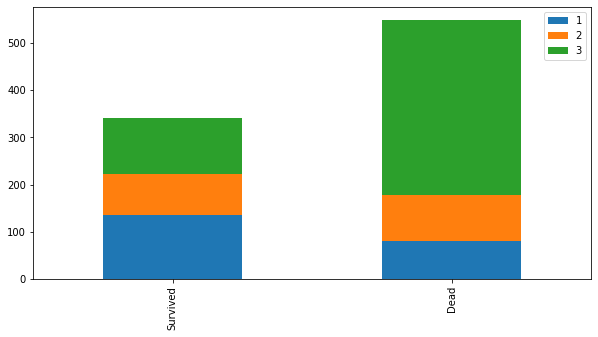

In [205]:
train[train["Survived"]==1]# survived가 1인 사람만 출력
survived=train[train["Survived"]==1]["Pclass"].value_counts() # 생존한 사람들의 성별 세기
dead=train[train["Survived"]==0]["Pclass"].value_counts()
dead
type(survived)
type(dead)
df=pd.DataFrame([survived, dead])
df.index=["Survived","Dead"]
df

import matplotlib.pyplot as plt
df.plot(kind="bar",stacked=True, figsize=(10,5))

In [249]:
def my_chart(feature):
    # train[train["Survived"]==1]# survived가 1인 사람만 출력
    survived=train[train["Survived"]==1][feature].value_counts() # 생존한 사람들의 성별 세기
    dead=train[train["Survived"]==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=["Survived","Dead"]
    df.plot(kind="bar",stacked=True)
    


In [247]:
my_chart("Sex")

TypeError: no numeric data to plot

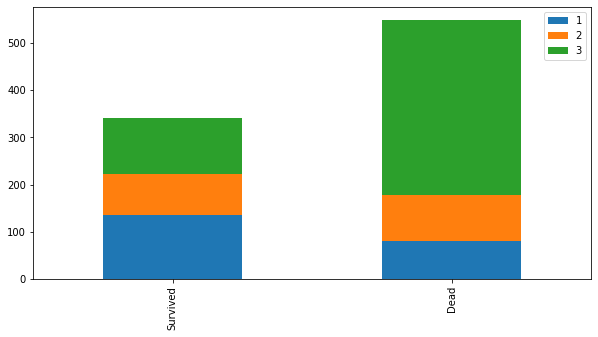

In [209]:
my_chart("Pclass")

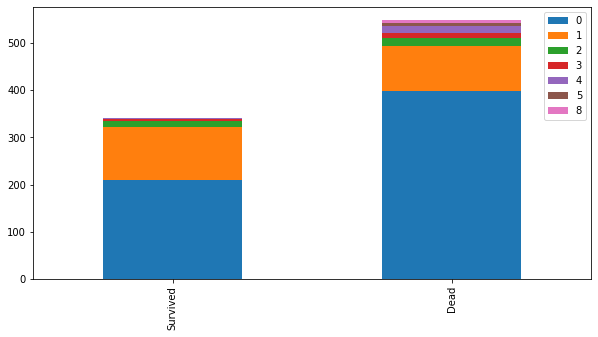

In [210]:
my_chart("SibSp")

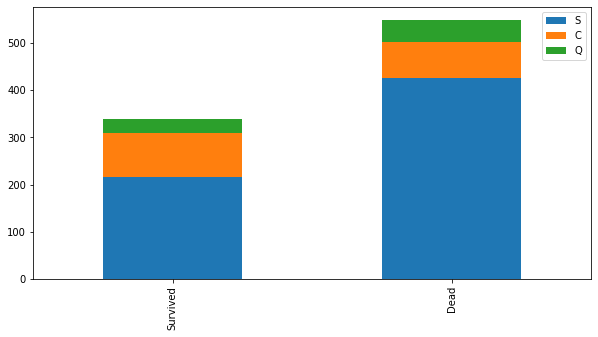

In [211]:
my_chart("Embarked")

In [233]:
train["title"]=train.Name.str.extract(" ([A-Za-z]+)\.") # 정규식으로 호칭 추출 
train.title.value_counts()

title_mapping={"Mr":0, "Miss":1, "Mrs":2, "Master":3}
train.title=train.title.map(title_mapping)
train.title.value_counts()

0.0    517
1.0    182
2.0    125
3.0     40
Name: title, dtype: int64

In [234]:
train.drop("Name", axis=1, inplace=True)

In [235]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0.0


In [250]:
sm={"male":0,"female":1}
train["Sex"]=train["Sex"].map(sm)
train
my_chart("Sex")

TypeError: no numeric data to plot

In [257]:
train.Age
# 16세 이하 :0, 16~26이하 : 1, 26~36이하:2, 36~36:3, 62초과:4
ages=train.Age
bins=[0,16,26,36,62,99]
labels=[0,1,2,3,4]
train.Age=pd.cut(ages, bins, labels=labels)
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,30.0000,C148,C


In [277]:
train=pd.read_csv("train.csv")
train.loc[train.Age<=16,"Age"]=0
train.loc[(train.Age>16) & (train.Age<=26),"Age"]=1
train.loc[(train.Age>26) & (train.Age<=36),"Age"]=2
train.loc[(train.Age>36) & (train.Age<=62),"Age"]=3
train.loc[train.Age>62,"Age"]=4
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,111369,30.0000,C148,C
